In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_parquet('raw_train.parquet')
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,label
0,0.041847,tcp,-,FIN,38.0,40.0,2438.0,19266.0,31.0,29.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2.0,11.0,0.0,0
1,1.089133,tcp,http,FIN,14.0,18.0,1684.0,10168.0,31.0,29.0,...,1.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0
2,0.000002,udp,dns,INT,2.0,0.0,114.0,0.0,254.0,0.0,...,17.0,17.0,25.0,0.0,0.0,0.0,17.0,25.0,0.0,1
3,1.467246,tcp,ftp,FIN,12.0,12.0,2618.0,682.0,254.0,252.0,...,1.0,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,1
4,0.000927,udp,dns,CON,2.0,2.0,130.0,162.0,31.0,29.0,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,4.0,0.0,0


In [4]:
df.select_dtypes(include='object')

,feature2,feature3,feature4
0,tcp,-,FIN
1,tcp,http,FIN
2,udp,dns,INT
3,tcp,ftp,FIN
4,udp,dns,CON
...,...,...,...
61836,tcp,smtp,FIN
61837,tcp,-,FIN
61838,udp,dns,INT
61839,unas,-,INT


In [5]:
check = df.columns.isna().sum()
check


0

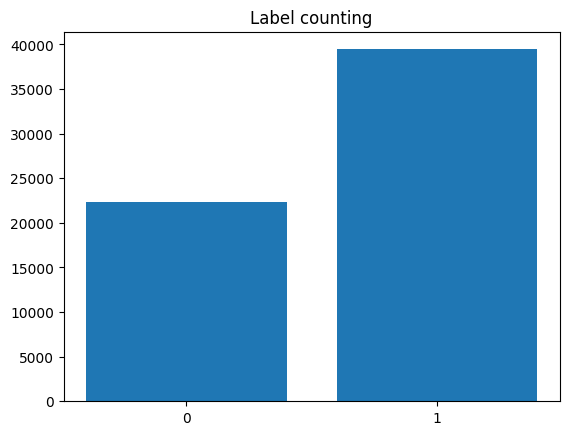

In [6]:
check = df['label'].value_counts()
plt.bar(check.index, check.values)
plt.title('Label counting')
plt.xticks(check.index)
plt.show()

In [31]:
print(df['feature2'].value_counts())

tcp       29587
udp       22189
unas       3754
arp         888
ospf        802
          ...  
idrp         22
isis         22
netblt       22
igmp          5
icmp          3
Name: feature2, Length: 132, dtype: int64


In [30]:
print(df['feature3'].value_counts())


-           34063
dns         16321
http         6540
smtp         1707
ftp-data     1260
ftp          1128
pop3          380
ssh           346
dhcp           38
ssl            23
snmp           21
irc             8
radius          6
Name: feature3, dtype: int64


In [32]:
print(df['feature4'].value_counts())

FIN    28165
INT    27882
CON     4848
REQ      922
RST       20
ECO        3
ACC        1
Name: feature4, dtype: int64


# **Relationship of Object Columns with Label**

**Feature2 and label**

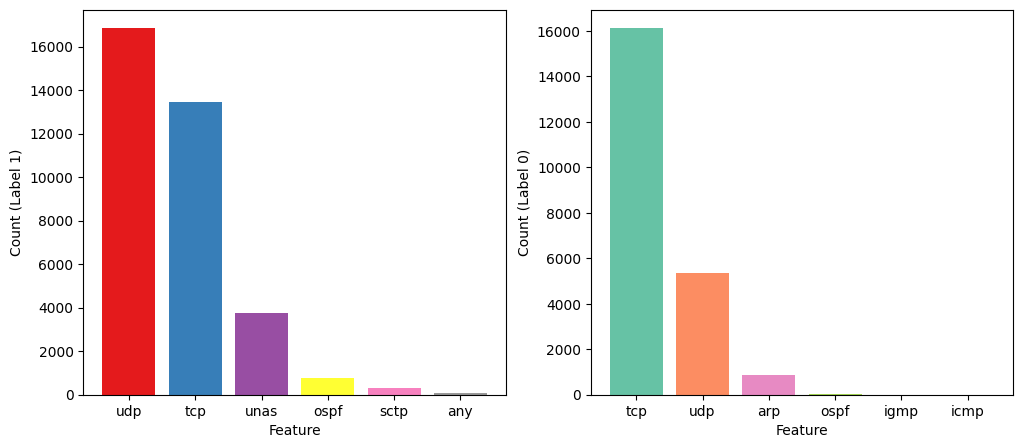

In [7]:
# Count for label == 1
top_n= 6
f2_lb1 = df[df['label'] == 1].groupby('feature2')['label'].count()
idx1 = np.array(f2_lb1.index)
value1 = np.array(f2_lb1.values)
sorted_indices1 = np.argsort(value1)[::-1]
sorted_values1 = value1[sorted_indices1]
sorted_idx1 = idx1[sorted_indices1]

# Count for label == 0
f2_lb0 = df[df['label'] == 0].groupby('feature2')['label'].count()
idx0 = np.array(f2_lb0.index)
value0 = np.array(f2_lb0.values)
sorted_indices0 = np.argsort(value0)[::-1]
sorted_values0 = value0[sorted_indices0]
sorted_idx0 = idx0[sorted_indices0]

# Generate a list of colors for each bin
num_bins1 = len(sorted_values1[:top_n])
colors1 = plt.cm.Set1(np.linspace(0, 1, num_bins1))

num_bins0 = len(sorted_values0[:top_n])
colors0 = plt.cm.Set2(np.linspace(0, 1, num_bins0))

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))

# Plot for label == 1
ax1.bar(sorted_idx1[:top_n], sorted_values1[:top_n], color=colors1)
ax1.set_ylabel('Count (Label 1)')
ax1.set_xlabel('Feature')

# Plot for label == 0
ax2.bar(sorted_idx0[:top_n], sorted_values0[:top_n], color=colors0)
ax2.set_xlabel('Feature')
ax2.set_ylabel('Count (Label 0)')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()


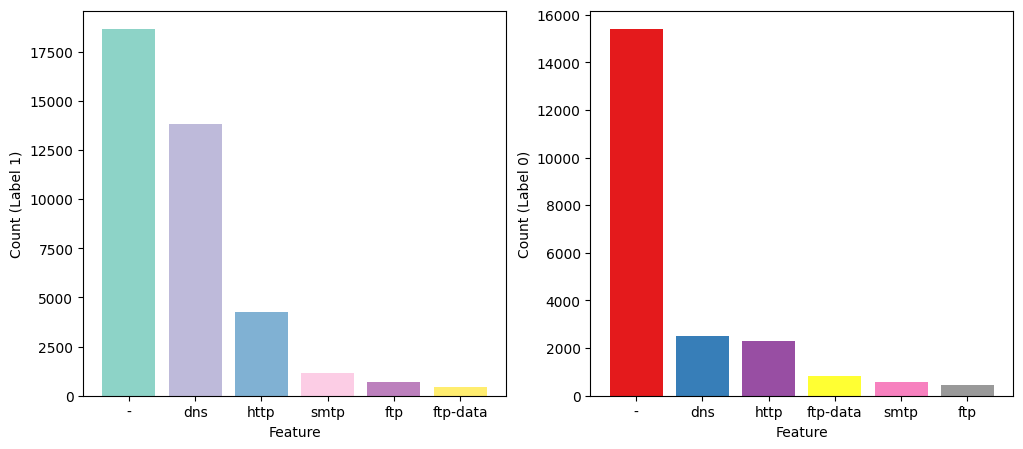

In [8]:
# Count for label == 1
top_n= 6
f3_lb1 = df[df['label'] == 1].groupby('feature3')['label'].count()
idx1 = np.array(f3_lb1.index)
value1 = np.array(f3_lb1.values)
sorted_indices1 = np.argsort(value1)[::-1]
sorted_values1 = value1[sorted_indices1]
sorted_idx1 = idx1[sorted_indices1]

# Count for label == 0
f3_lb0 = df[df['label'] == 0].groupby('feature3')['label'].count()
idx0 = np.array(f3_lb0.index)
value0 = np.array(f3_lb0.values)
sorted_indices0 = np.argsort(value0)[::-1]
sorted_values0 = value0[sorted_indices0]
sorted_idx0 = idx0[sorted_indices0]

# Generate a list of colors for each bin
num_bins1 = len(sorted_values1[:top_n])
colors1 = plt.cm.Set3(np.linspace(0, 1, num_bins1))

num_bins0 = len(sorted_values0[:top_n])
colors0 = plt.cm.Set1(np.linspace(0, 1, num_bins0))

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))

# Plot for label == 1
ax1.bar(sorted_idx1[:top_n], sorted_values1[:top_n], color=colors1)
ax1.set_xlabel('Feature')
ax1.set_ylabel('Count (Label 1)')

# Plot for label == 0
ax2.bar(sorted_idx0[:top_n], sorted_values0[:top_n], color=colors0)
ax2.set_xlabel('Feature')
ax2.set_ylabel('Count (Label 0)')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()


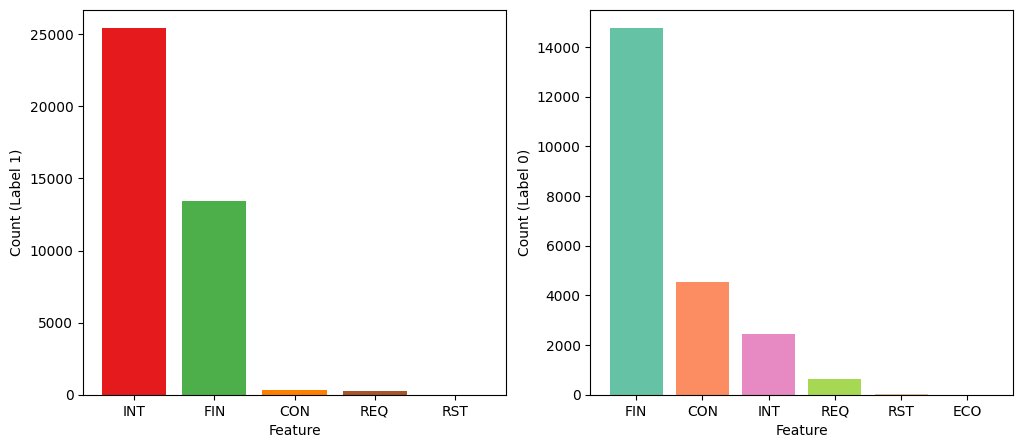

In [9]:
# Count for label == 1
top_n= 6
f4_lb1 = df[df['label'] == 1].groupby('feature4')['label'].count()
idx1 = np.array(f4_lb1.index)
value1 = np.array(f4_lb1.values)
sorted_indices1 = np.argsort(value1)[::-1]
sorted_values1 = value1[sorted_indices1]
sorted_idx1 = idx1[sorted_indices1]

# Count for label == 0
f4_lb0 = df[df['label'] == 0].groupby('feature4')['label'].count()
idx0 = np.array(f4_lb0.index)
value0 = np.array(f4_lb0.values)
sorted_indices0 = np.argsort(value0)[::-1]
sorted_values0 = value0[sorted_indices0]
sorted_idx0 = idx0[sorted_indices0]

# Generate a list of colors for each bin
num_bins1 = len(sorted_values1[:top_n])
colors1 = plt.cm.Set1(np.linspace(0, 1, num_bins1))

num_bins0 = len(sorted_values0[:top_n])
colors0 = plt.cm.Set2(np.linspace(0, 1, num_bins0))

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))

# Plot for label == 1
ax1.bar(sorted_idx1[:top_n], sorted_values1[:top_n], color=colors1)
ax1.set_ylabel('Count (Label 1)')
ax1.set_xlabel('Feature')

# Plot for label == 0
ax2.bar(sorted_idx0[:top_n], sorted_values0[:top_n], color=colors0)
ax2.set_xlabel('Feature')
ax2.set_ylabel('Count (Label 0)')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()


# **Solve value '-' in feature2**

In [10]:
df1 = df.copy()
df1['feature3'] = df1['feature3'].replace("-", "unknown")
df1['feature3']


0        unknown
1           http
2            dns
3            ftp
4            dns
          ...   
61836       smtp
61837    unknown
61838        dns
61839    unknown
61840        dns
Name: feature3, Length: 61841, dtype: object

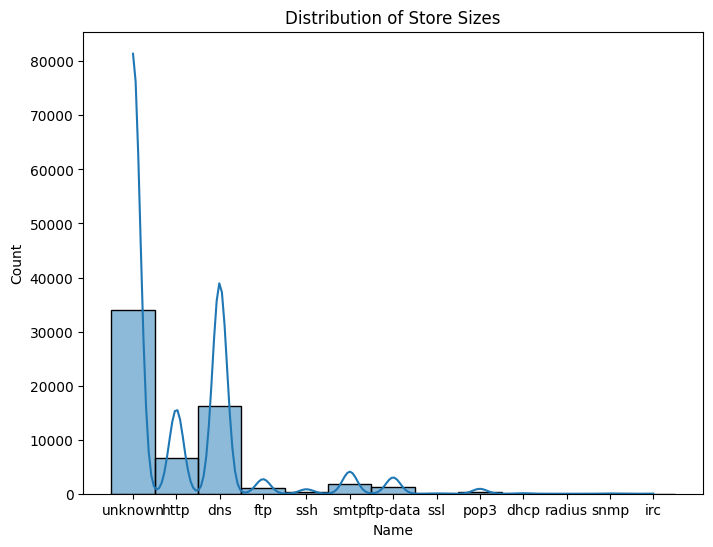

In [11]:
# Distribution of store sizes
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='feature3', kde=True)
plt.title('Distribution of Store Sizes')
plt.xlabel('Name')
plt.ylabel('Count')
plt.show()

# **Encoding Idea**

Đặt trọng số cao cho những value tác động mạnh tới label

Ordinal Encoding with Custom Ranking: If the categories have an inherent order or ranking based on their importance, you can use ordinal encoding and assign higher numerical labels to the more important categories. For example, if you have categories like "Low," "Medium," and "High," you can assign labels such as 1, 2, and 3 respectively. Ensure that the assigned labels reflect the relative importance of the categories.

One-Hot Encoding with Additional Columns: Instead of encoding the weighted category with a single binary column like in typical one-hot encoding, you can introduce multiple binary columns specifically for that category. For example, if your column is "Color" and "Red" carries more weight, you can create two columns: "Is_Red" and "Color_Other." "Is_Red" will be set to 1 for the rows where the color is "Red" and 0 otherwise. "Color_Other" will capture the rest of the colors.

Target Encoding: Target encoding refers to encoding categorical variables based on the target variable's mean or some other statistical measure. If the weighted value in your categorical column is associated with a specific target variable (e.g., sales, conversion), you can calculate the average of the target variable for each category and use those values as the encoded representation. This allows the encoding to reflect the impact of each category on the target.\

**with numeric columns**

normalization some columns like 14,20

# **Numerical columns**

**High correlation coefficient col with target**

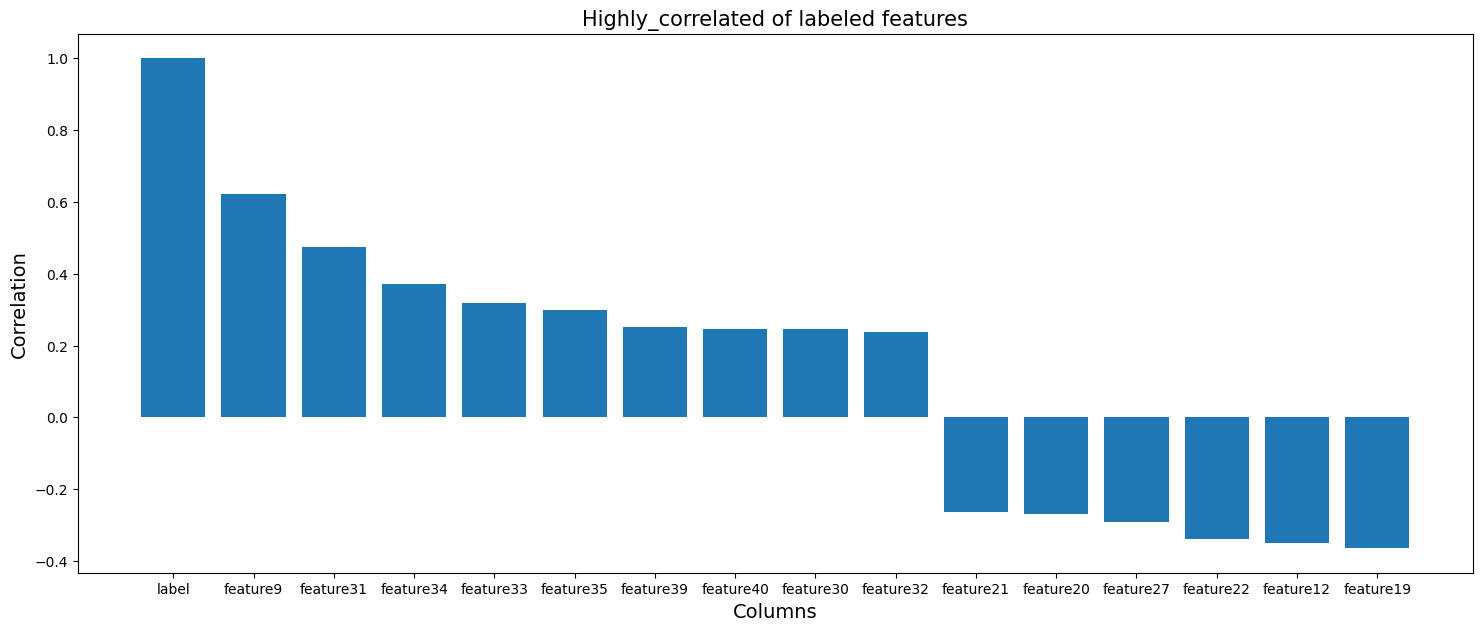

In [12]:
import warnings
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(18,7))
corr_matrix = df.corr()["label"].sort_values(ascending=False)
highly_correlated = corr_matrix[abs(corr_matrix) >= 0.2]

# Get the names of the highly correlated features
names = list(highly_correlated.index)
names.remove('label')
plt.bar(highly_correlated.index, highly_correlated.values)
plt.xlabel('Columns', fontsize= 14)
plt.ylabel('Correlation', fontsize =14)
plt.title('Highly_correlated of labeled features', fontsize = 15)
plt.show()



In [13]:
df2 = df.copy()
df2 = df2.drop(['label', 'feature2', 'feature3', 'feature4'],axis=1)
df2

,feature1,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,...,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41
0,0.041847,38.0,40.0,2438.0,19266.0,31.0,29.0,4.538438e+05,3.591177e+06,7.0,...,5.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,11.0,0.0
1,1.089133,14.0,18.0,1684.0,10168.0,31.0,29.0,1.148804e+04,7.054418e+04,3.0,...,2.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0
2,0.000002,2.0,0.0,114.0,0.0,254.0,0.0,2.280000e+08,0.000000e+00,0.0,...,18.0,17.0,17.0,25.0,0.0,0.0,0.0,17.0,25.0,0.0
3,1.467246,12.0,12.0,2618.0,682.0,254.0,252.0,1.308574e+04,3.413197e+03,3.0,...,1.0,1.0,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0
4,0.000927,2.0,2.0,130.0,162.0,31.0,29.0,5.609493e+05,6.990291e+05,0.0,...,3.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61836,1.751882,52.0,40.0,37232.0,3276.0,31.0,29.0,1.667510e+05,1.459002e+04,18.0,...,2.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0
61837,0.929489,10.0,10.0,608.0,646.0,254.0,252.0,4.716570e+03,5.009204e+03,1.0,...,3.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0
61838,0.000008,2.0,0.0,114.0,0.0,254.0,0.0,5.700000e+07,0.000000e+00,0.0,...,41.0,41.0,20.0,51.0,0.0,0.0,0.0,41.0,51.0,0.0
61839,0.000009,2.0,0.0,200.0,0.0,254.0,0.0,8.888889e+07,0.000000e+00,0.0,...,1.0,1.0,1.0,5.0,0.0,0.0,0.0,3.0,5.0,0.0


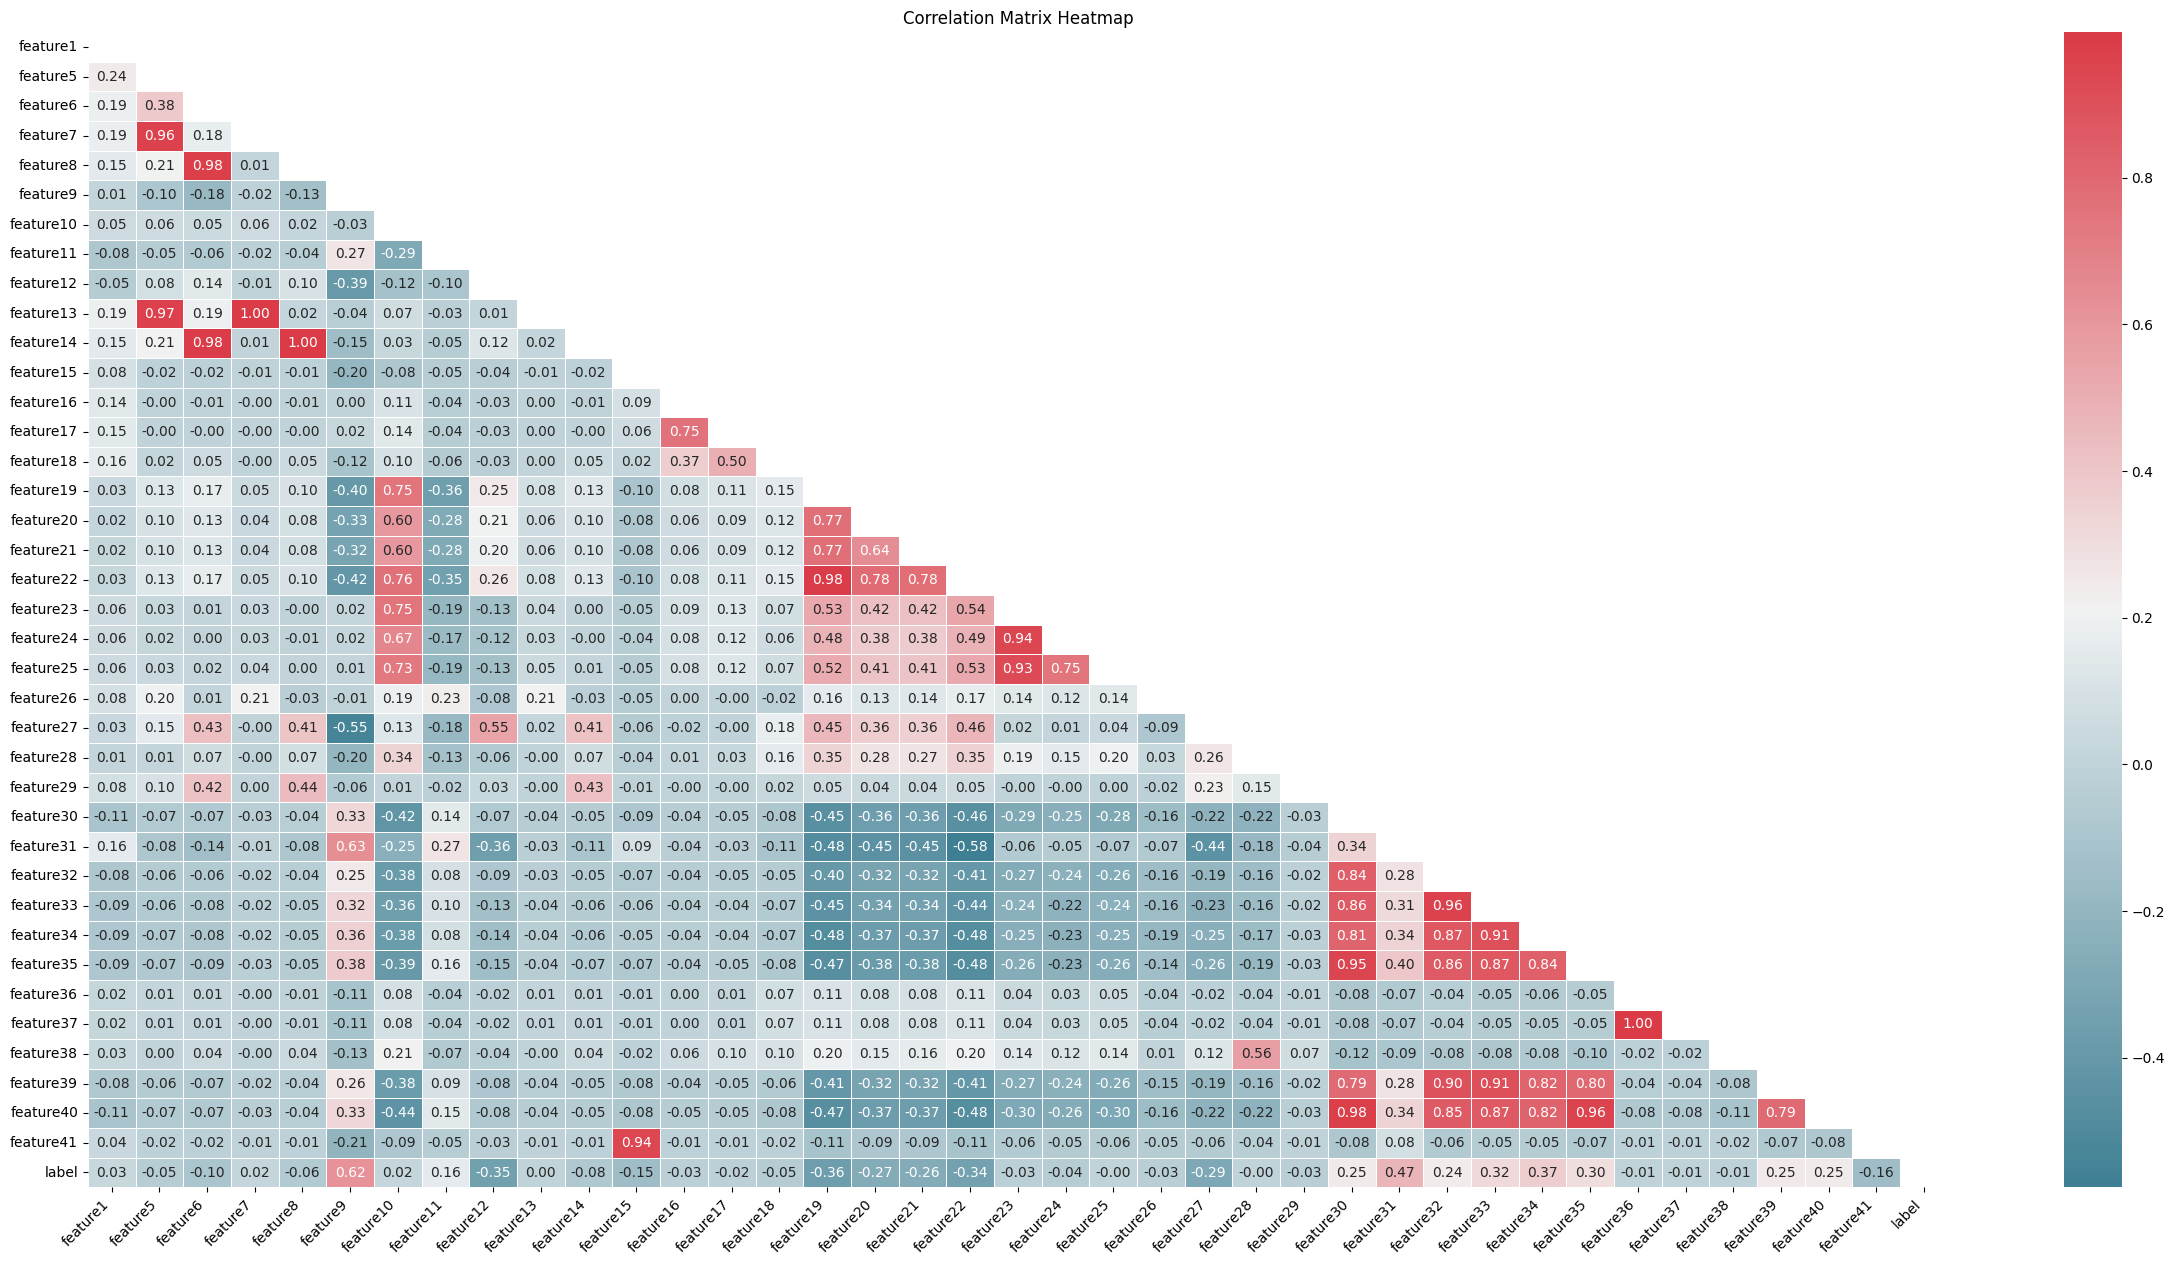

In [14]:
fig = plt.figure(figsize=(30, 15))
corr = df.corr()

# Create a custom color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)

# Rotate the x-axis labels
plt.xticks(rotation=45, horizontalalignment='right')

# Set the title
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()


**Đa cộng tuyến**

f9: f31, f27

f12: f27

f19 - f22 - f21 - f20

f30 - f31 - f32 - f33 - f34 - f35

f39 - f40

**About data multicollinearity**

The decision to remove multicollinearity before building a model depends on the specific problem and data you are working with. Here are some factors to consider when deciding whether to remove multicollinearity:

1. Data reliability: Multicollinearity can reduce the accuracy of the model and increase prediction errors. If your data contains a lot of noise or strong signals from independent variables that are unrelated, removing multicollinearity may improve the predictive ability of the model.

2. Model performance: Some models, such as linear regression, require independent variables without multicollinearity to make accurate predictions. In such cases, removing multicollinearity is necessary to ensure the model performs well.

3. Dimensionality reduction: Multicollinearity can create strong correlations between input variables, leading to redundant information and difficulties in interpreting the model's results. By removing multicollinearity, you can reduce the number of input variables and decrease the dimensionality of the data, making the model easier to understand.

However, there are also cases where removing multicollinearity is not recommended:

1. Loss of information: Multicollinearity may contain important information related to the predicted outcome. In this case, removing multicollinearity may result in a loss of crucial information and decrease the model's performance.

2. Limited sample size: If you have a small number of observations in your data, removing multicollinearity may result in too much information loss and lead to deficiencies in the model's accuracy.

3. Computational complexity: Removing multicollinearity requires more complex computations and may increase the training time of the model. If your data is very large and removing multicollinearity does not bring significant benefits, you may consider keeping them.

In conclusion, the decision to remove multicollinearity depends on the specific case. For each problem, you should consider factors such as data reliability, model performance, dimensionality reduction, and information loss to make the best decision based on your needs.











# **Detect outlier**

In [15]:
df1 = df.select_dtypes(exclude='object')


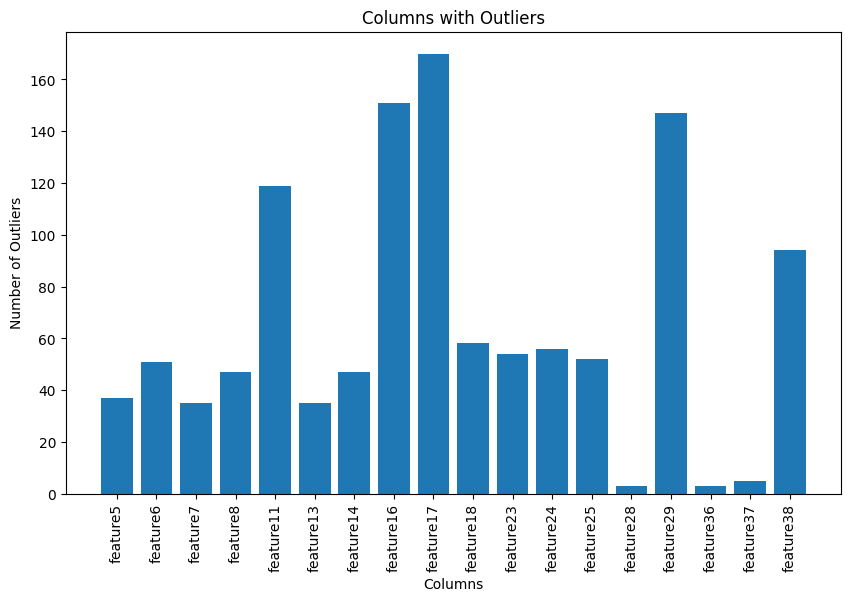

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming your data is already loaded into a DataFrame called 'df1'
z_scores = np.abs(stats.zscore(df1))
threshold = 10
outliers_count = np.sum(z_scores > threshold, axis=0)
columns_with_outliers = df1.columns[outliers_count > 0].tolist()

# Plotting the columns with outliers
plt.figure(figsize=(10, 6))
plt.bar(columns_with_outliers, outliers_count[outliers_count > 0])
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.title('Columns with Outliers')
plt.xticks(rotation=90)
plt.show()


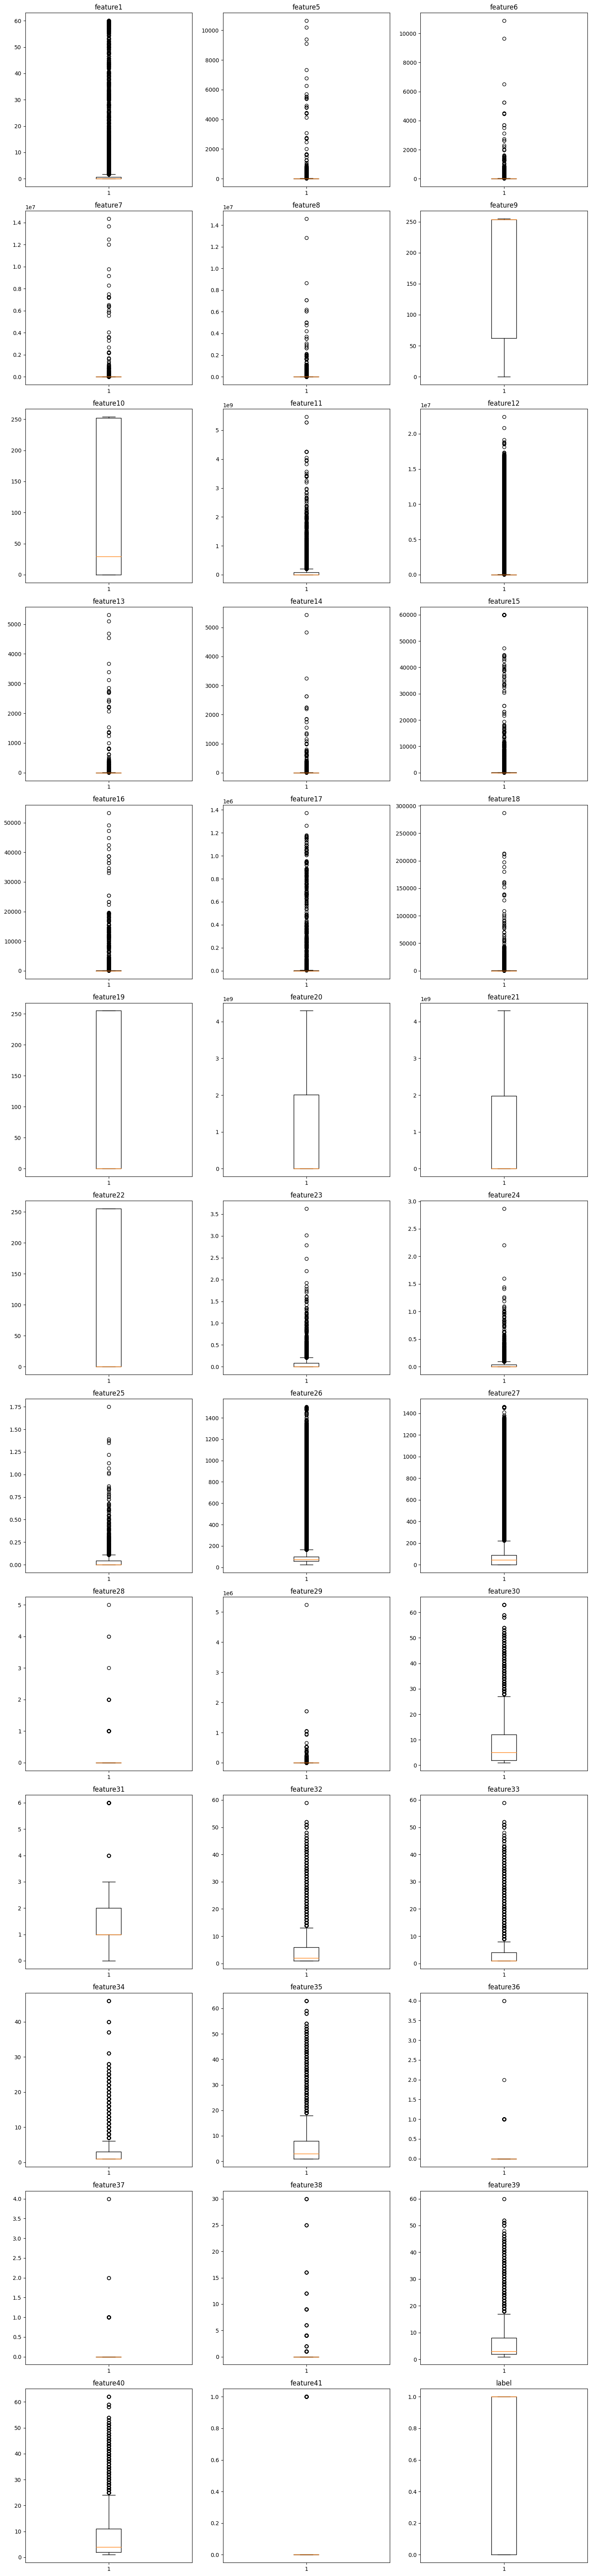

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import math

def plot_boxplot_subplots(df):
    num_columns = df.shape[1]
    nrows = int(math.ceil(num_columns / 3))  # Adjust the number of columns per row (here: 3)

    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5 * nrows))
    fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

    column_names = list(df.columns)
    for i, ax in enumerate(axes.flat):
        if i < num_columns:
            column_name = column_names[i]
            ax.boxplot(df[column_name])
            ax.set_title(column_name)

    plt.tight_layout()
    plt.show()
plot_boxplot_subplots(df1)

# **Check Feature Importance with label by Tree Based method**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = df2
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Convert data to DMatrix format (required by XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set XGBoost parameters for binary classification
params = {
    'objective': 'binary:logistic',  # Binary logistic regression objective
}

# Train the model
model = xgb.train(params, dtrain)

# Predict on the test set
predictions = model.predict(dtest)

# Feature importance
feature_importance = model.get_score(importance_type='weight')


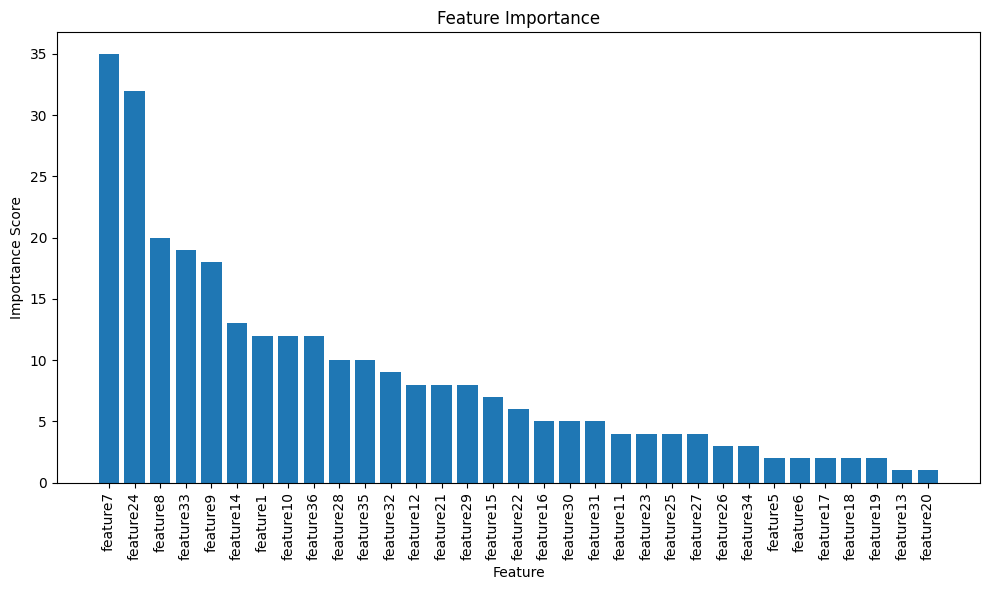

In [ ]:
# Get feature names and importance scores
feature_names = list(X_train.columns)
importance_scores = list(feature_importance.values())

# Sort feature names and importance scores in descending order
sorted_indices = sorted(range(len(importance_scores)), key=lambda k: importance_scores[k], reverse=True)
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importance_scores = [importance_scores[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance_scores)), sorted_importance_scores, align='center')
plt.xticks(range(len(sorted_importance_scores)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [ ]:
len(feature_importance)

33

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = df2  # Features (input data)
y = df['label']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a random forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Feature importance
feature_importance = model.feature_importances_


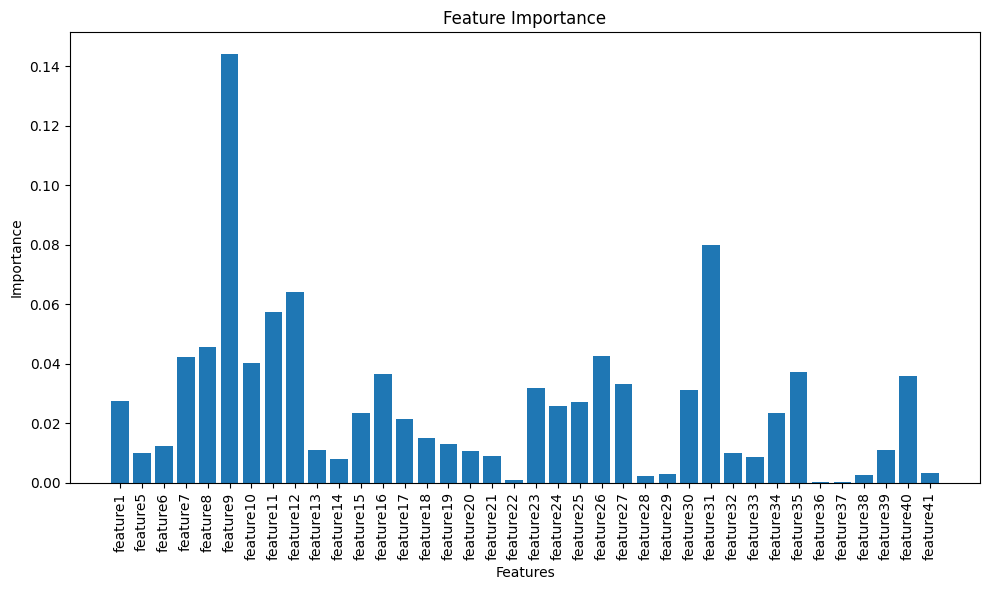

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), X.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
